In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/AIES/NN Project/Phase2/OCT2017_dataset.zip' -d '/content' &> /dev/null

In [ ]:
import os
from glob import glob
import pandas as pd
import numpy as np
from numpy import expand_dims
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sn
from skimage.transform import resize
from skimage.color import gray2rgb
from sklearn.metrics import classification_report, confusion_matrix
from IPython.display import SVG
from tensorflow import keras
from tensorflow.keras import applications, optimizers
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.utils import to_categorical, model_to_dot, plot_model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger, ReduceLROnPlateau

In [ ]:
DATA_DIR = '/content/OCT2017'
TRAIN_DIR = os.path.join(DATA_DIR, 'train')
VAL_DIR = os.path.join(DATA_DIR, 'val')
TEST_DIR = os.path.join(DATA_DIR, 'test')

Normal


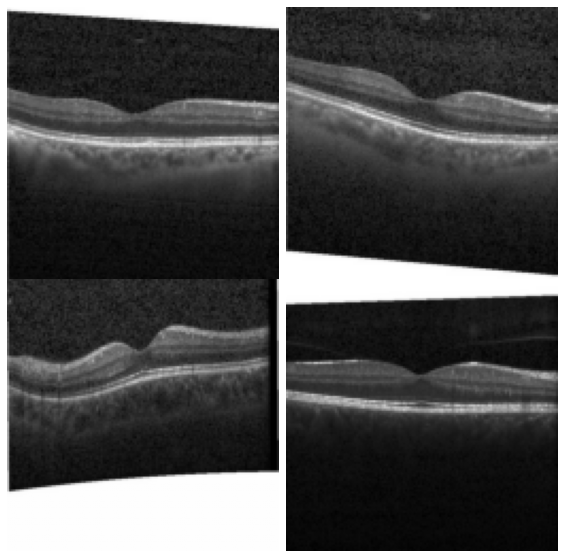

In [ ]:
print("Normal")
multipleImages = glob(os.path.join('/content/OCT2017/train/NORMAL/**'))
i = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for im in multipleImages[:4]:
    image = mpimg.imread(im)
    image_resized = resize(image, (128, 128)) 
    plt.subplot(2, 2, i+1) #.set_title(l)
    plt.imshow(gray2rgb(image_resized)); plt.axis('off')
    i += 1

Choroidal Neo-Vascularization (CNV)


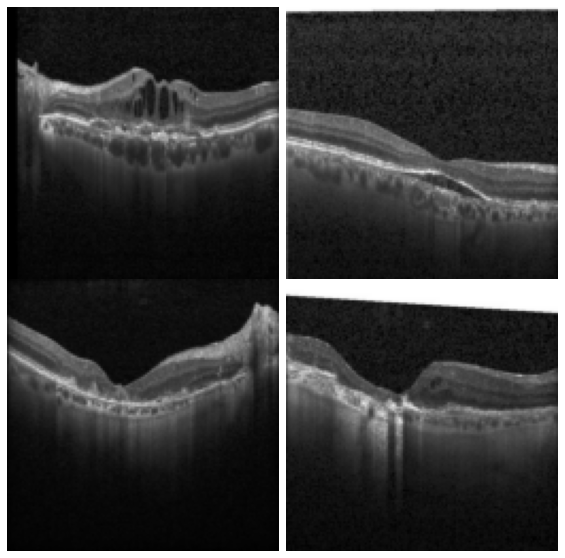

In [ ]:
print("Choroidal Neo-Vascularization (CNV)")
multipleImages = glob(os.path.join('/content/OCT2017/train/CNV/**'))
i = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for im in multipleImages[:4]:
    image = mpimg.imread(im)
    image_resized = resize(image, (128, 128)) 
    plt.subplot(2, 2, i+1) #.set_title(l)
    plt.imshow(gray2rgb(image_resized)); plt.axis('off')
    i += 1

Diabetic Macular Edema (DME)


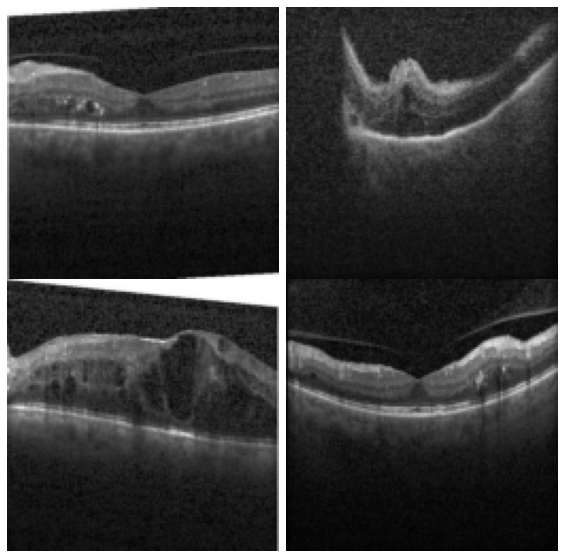

In [ ]:
print("Diabetic Macular Edema (DME)")
multipleImages = glob(os.path.join('/content/OCT2017/train/DME/**'))
i = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for im in multipleImages[:4]:
    image = mpimg.imread(im)
    image_resized = resize(image, (128, 128)) 
    plt.subplot(2, 2, i+1) #.set_title(l)
    plt.imshow(gray2rgb(image_resized)); plt.axis('off')
    i += 1

Drusen


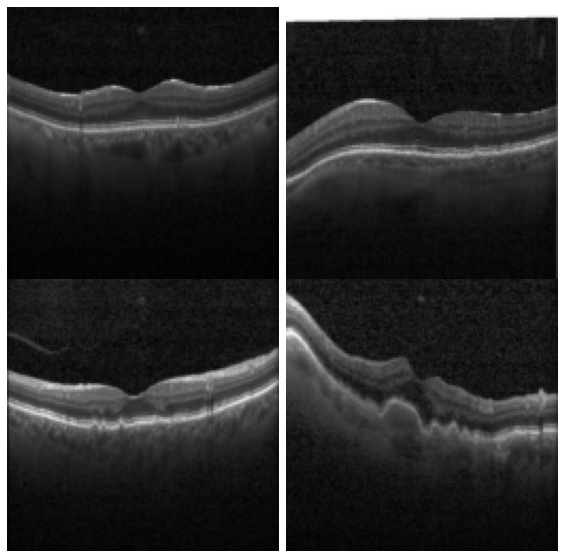

In [ ]:
print("Drusen")
multipleImages = glob(os.path.join('/content/OCT2017/train/DRUSEN/**'))
i = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for im in multipleImages[:4]:
    image = mpimg.imread(im)
    image_resized = resize(image, (128, 128)) 
    plt.subplot(2, 2, i+1) #.set_title(l)
    plt.imshow(gray2rgb(image_resized)); plt.axis('off')
    i += 1

In [ ]:
IMG_WIDTH, IMG_HEIGHT = 100, 100
BATCH_SIZE = 128

In [ ]:
datagen = ImageDataGenerator(
    rescale= 1./255, 
)

train_generator = datagen.flow_from_directory(  
    TRAIN_DIR,  
    target_size= (IMG_WIDTH, IMG_HEIGHT), 
    color_mode= 'rgb',
    batch_size= BATCH_SIZE,  
    class_mode= 'categorical',
    shuffle= True, 
    seed= 1337
) 

valid_generator = datagen.flow_from_directory(
    VAL_DIR,
    target_size= (IMG_WIDTH, IMG_HEIGHT),
    color_mode= 'rgb',
    batch_size= BATCH_SIZE,  
    class_mode= 'categorical',
    shuffle= True, 
    seed= 1337
)

test_generator = datagen.flow_from_directory(  
    TEST_DIR,  
    target_size= (IMG_WIDTH, IMG_HEIGHT), 
    color_mode= 'rgb',
    batch_size= BATCH_SIZE,        
    class_mode= 'categorical',
    shuffle= False, 
)

Found 83484 images belonging to 4 classes.
Found 32 images belonging to 4 classes.
Found 968 images belonging to 4 classes.


In [ ]:
print(train_generator.class_indices)
num_classes = len(train_generator.class_indices)  
train_labels = train_generator.classes 
train_labels = to_categorical(train_labels, num_classes=num_classes)
valid_labels = valid_generator.classes 
valid_labels = to_categorical(valid_labels, num_classes=num_classes)
nb_train_samples = len(train_generator.filenames)  
nb_valid_samples = len(valid_generator.filenames)
nb_test_samples = len(test_generator.filenames)

{'CNV': 0, 'DME': 1, 'DRUSEN': 2, 'NORMAL': 3}


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3, 100, 100)]     0         
                                                                 
 flatten (Flatten)           (None, 30000)             0         
                                                                 
 dense (Dense)               (None, 50)                1500050   
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 50)                2550      
                                                                 
 dense_4 (Dense)             (None, 50)                2550  

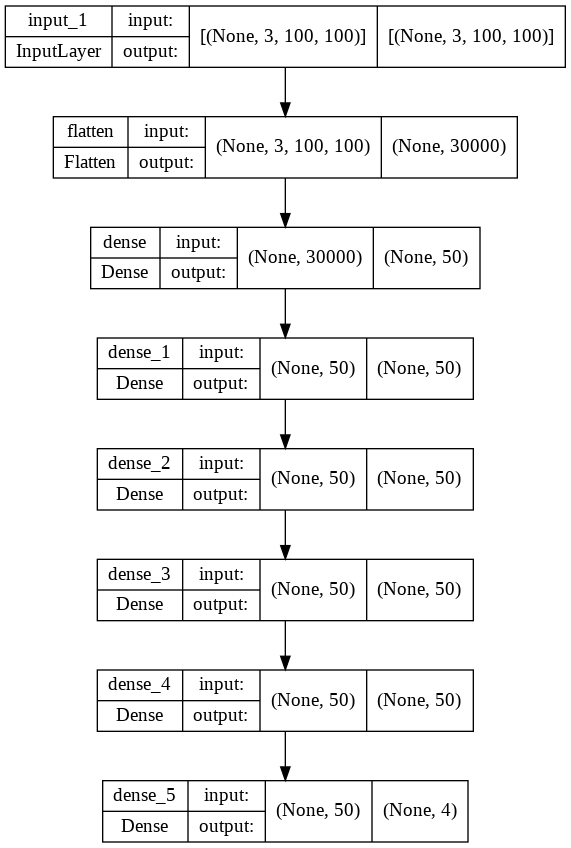

In [ ]:
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.utils import plot_model

input_layer = Input(shape = (3, IMG_WIDTH, IMG_HEIGHT,))
flat_layer = Flatten(input_shape= (3, IMG_WIDTH, IMG_HEIGHT))(input_layer)
hidden_layer1 = Dense(units = 50, activation = 'relu')(flat_layer)
hidden_layer2 = Dense(units = 50, activation = 'relu')(hidden_layer1)
hidden_layer3 = Dense(units = 50, activation = 'relu')(hidden_layer2)
hidden_layer4 = Dense(units = 50, activation = 'relu')(hidden_layer3)
hidden_layer5 = Dense(units = 50, activation = 'relu')(hidden_layer4)
out_layer = Dense(units = num_classes, activation = 'softmax')(hidden_layer5)

model = Model(inputs = input_layer, outputs = out_layer)

opt = keras.optimizers.Adam(learning_rate= 0.0001)
model.compile(optimizer= opt, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

plot_model(model, show_shapes=True)

In [ ]:
checkpoint = ModelCheckpoint(
    'baseline_model.h5',
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='auto',
    save_weights_only=False,
    save_freq='epoch'
)

earlystop = EarlyStopping(
    monitor='val_loss',
    min_delta=1e-3,
    patience=3,
    verbose=1,
    mode='auto'
)

csvlogger = CSVLogger(
    filename= "baseline_training_csv.log",
    separator = ",",
    append = False
)

reduceLR = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    verbose=1, 
    mode='auto'
)

callbacks = [checkpoint, earlystop, csvlogger,reduceLR]

In [ ]:
history = model.fit(
    train_generator, 
    epochs = 30,
    batch_size = BATCH_SIZE,
    validation_data = test_generator, 
    callbacks = callbacks,
    shuffle = True
)

Epoch 1/30
653/653 [==============================] - ETA: 0s - loss: 1.0468 - accuracy: 0.5821
Epoch 1: val_loss improved from inf to 1.15955, saving model to baseline_model.h5
653/653 [==============================] - 318s 487ms/step - loss: 1.0468 - accuracy: 0.5821 - val_loss: 1.1596 - val_accuracy: 0.5062 - lr: 1.0000e-04
Epoch 2/30
653/653 [==============================] - ETA: 0s - loss: 0.9782 - accuracy: 0.6142
Epoch 2: val_loss improved from 1.15955 to 1.09718, saving model to baseline_model.h5
653/653 [==============================] - 285s 436ms/step - loss: 0.9782 - accuracy: 0.6142 - val_loss: 1.0972 - val_accuracy: 0.5434 - lr: 1.0000e-04
Epoch 3/30
653/653 [==============================] - ETA: 0s - loss: 0.9384 - accuracy: 0.6348
Epoch 3: val_loss improved from 1.09718 to 1.08481, saving model to baseline_model.h5
653/653 [==============================] - 278s 426ms/step - loss: 0.9384 - accuracy: 0.6348 - val_loss: 1.0848 - val_accuracy: 0.5630 - lr: 1.0000e-04
Ep

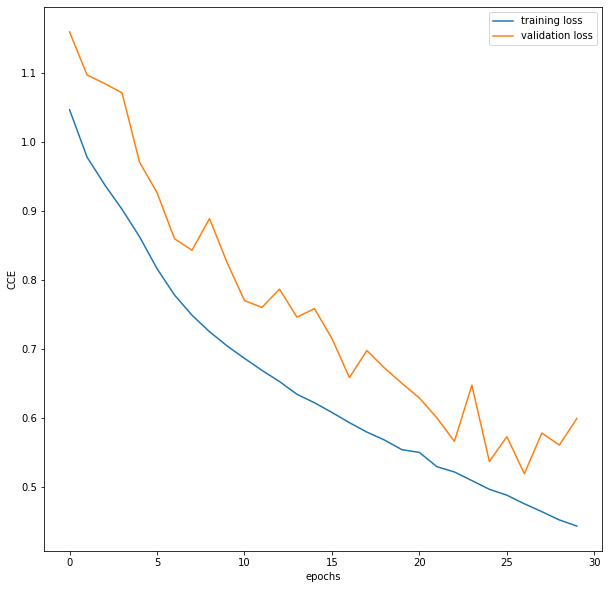

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_loss)
plt.plot(val_loss)

plt.legend(['training loss', 'validation loss'])
plt.xlabel('epochs')
plt.ylabel('CCE')
plt.show()

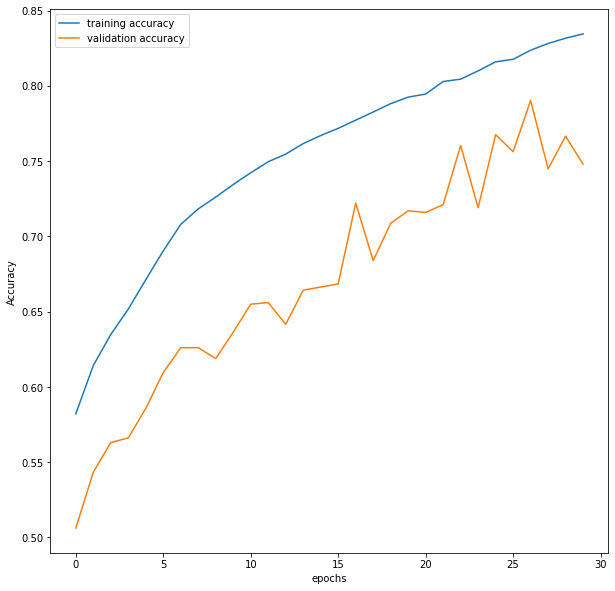

In [ ]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(train_accuracy)
plt.plot(val_accuracy)

plt.legend(['training accuracy', 'validation accuracy'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.show()

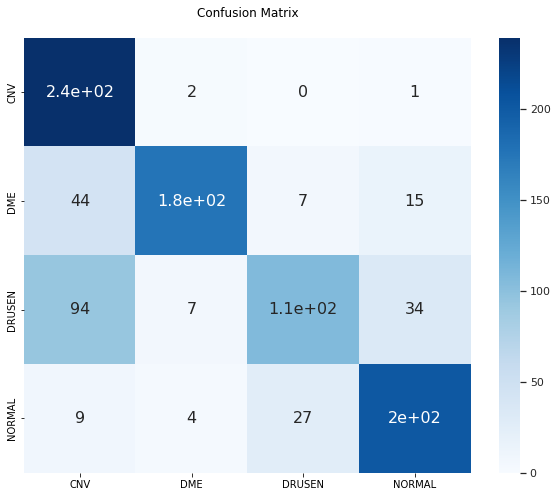

Classification Report

              precision    recall  f1-score   support

         CNV       0.62      0.99      0.76       242
         DME       0.93      0.73      0.82       242
      DRUSEN       0.76      0.44      0.56       242
      NORMAL       0.80      0.83      0.82       242

    accuracy                           0.75       968
   macro avg       0.78      0.75      0.74       968
weighted avg       0.78      0.75      0.74       968



In [ ]:
Y_pred = model.predict(test_generator, batch_size= BATCH_SIZE)
y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(test_generator.classes, y_pred)
df_cm = pd.DataFrame(cm, list(test_generator.class_indices.keys()), list(test_generator.class_indices.keys()))
fig, ax = plt.subplots(figsize=(10,8))
sn.set(font_scale=1.0) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap=plt.cm.Blues)
plt.title('Confusion Matrix\n')
plt.savefig('confusion_matrix.png', transparent= False, bbox_inches= 'tight', dpi= 400)
plt.show()

print('Classification Report\n')
target_names = list(test_generator.class_indices.keys())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))